# Multiple Regression - Multi Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import sklearn

In [7]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)

1.26.4
2.2.2
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]


In [10]:
df = pd.read_csv('../Data/housing.data', sep='\s+', header=None)
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()



<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5m/w0rlpsxd7yx_97nl1gx0dfzm0000gn/T/ipykernel_23410/1944539676.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('../Data/housing.data', sep='\s+', header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
df.shape

(506, 14)

In [28]:
X =  df.iloc[:, :-1] # X is now everything except the last component - so our data is everything and we are trying to predict the last column which is the MEDV
X.columns = col_name[:-1]
y = df['MEDV']

# StatsModels

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
X_constant = sm.add_constant(X)

In [31]:
pd.DataFrame(X_constant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [32]:
sm.OLS?

Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
Ordinary Least Squares

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is set to 0.
**kwa

In [34]:
model = sm.OLS(y, X_constant)

In [35]:
lr = model.fit()

In [36]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          6.72e-135
Time:                        10:47:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
form_lr = smf.ols(formula='y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          6.72e-135
Time:                        10:51:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model = smf.ols(formula='y ~ CRIM + ZN + CHAS + NOX' , data = X)
mlr = model.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     53.72
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.14e-37
Time:                        10:54:04   Log-Likelihood:                -1749.9
No. Observations:                 506   AIC:                             3510.
Df Residuals:                     501   BIC:                             3531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8818      2.157     15.245      0.000      28.644      37.119
CRIM          -0.2515      0.044     -5.676      0.000      -0.339      -0.164
ZN             0.0768      0.017      4.462      0.000       0.043       0.111
CHAS           6.9811      1.367      5.109      0.000       4.296       9.666
NOX          -19.4631      3.768     -5.166      0.000     -26.865     -12.061
==============================================================================
Omnibus:                      172.725   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.442
Skew:                           1.680   Prob(JB):                    4.71e-105
Kurtosis:                       6.390   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation Matrix

In [46]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


In [48]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6255,0.0000,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7637,0.0000,0.6448,-0.7080,0.0000,0.7208,0.0000,0.0000,0.6038,0.0000
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7637,0.0000,1.0000,0.0000,0.7315,-0.7692,0.6114,0.6680,0.0000,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6138,0.6954
AGE,0.0000,0.0000,0.6448,0.0000,0.7315,0.0000,1.0000,-0.7479,0.0000,0.0000,0.0000,0.0000,0.6023,0.0000
DIS,0.0000,0.6644,-0.7080,0.0000,-0.7692,0.0000,-0.7479,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6255,0.0000,0.0000,0.0000,0.6114,0.0000,0.0000,0.0000,1.0000,0.9102,0.0000,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7208,0.0000,0.6680,0.0000,0.0000,0.0000,0.9102,1.0000,0.0000,0.0000,0.0000,0.0000


<Axes: >

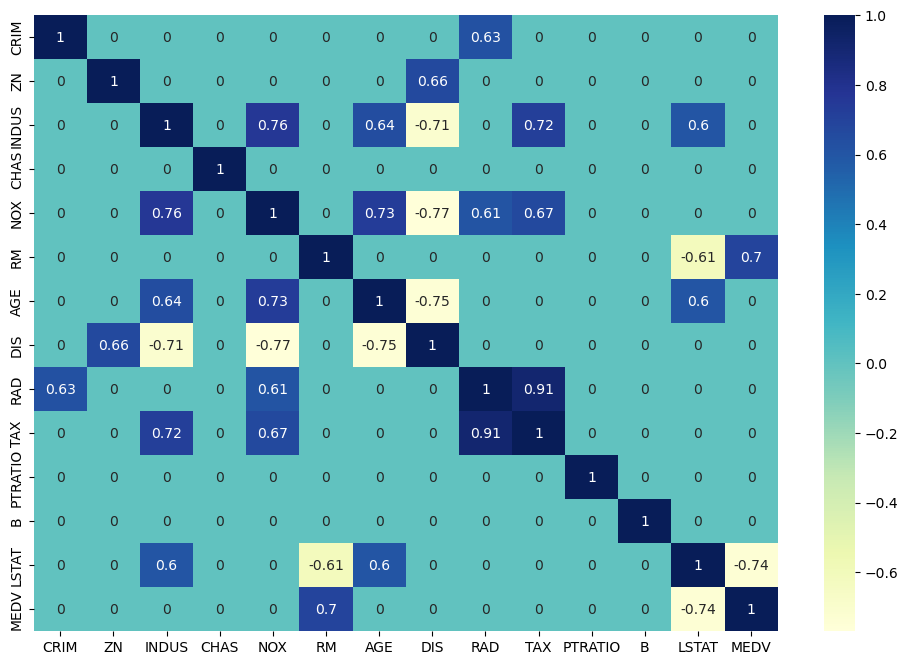

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')

# Detecting Colinearity with Eigenvectors

In [53]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())


In [55]:
pd.Series(eigenvalues).sort_values()

8    0.0603
9    0.1340
12   0.1830
13   0.2128
11   0.2523
10   0.2773
7    0.4031
6    0.5354
5    0.6600
4    0.8509
3    0.8865
2    1.3489
1    1.6495
0    6.5460
dtype: float64

In [56]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False) 

9    0.6988
8    0.6350
2    0.2355
13   0.1341
1    0.0963
4    0.0876
12   0.0831
0    0.0591
10   0.0557
7    0.0471
6    0.0382
3    0.0235
11   0.0162
5    0.0072
dtype: float64

# Standardize varaibles so that the slope values mean something

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [61]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
result

,coefficient
name,
CRIM,-0.1080
ZN,0.0464
INDUS,0.0206
CHAS,2.6867
NOX,-17.7666
RM,3.8099
AGE,0.0007
DIS,-1.4756
RAD,0.3060


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
standard_coefficient_linear_reg = make_pipeline(scaler, model)

In [63]:
standard_coefficient_linear_reg.fit(X, y)
result = pd.DataFrame(list(zip(standard_coefficient_linear_reg.steps[1][1].coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSTAT,3.7436
DIS,3.1040
RM,2.6742
RAD,2.6622
TAX,2.0768
PTRATIO,2.0606
NOX,2.0567
ZN,1.0816
CRIM,0.9281


# Utlizing $R^2$ to identify key features

In [64]:
from sklearn.metrics import r2_score

In [66]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.7406426641094095

In [67]:
linear_reg_woLstat = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=df)
benchmark_without_Lstat = linear_reg_woLstat.fit()
r2_score(y, benchmark_without_Lstat.predict(df))

0.6842042799773889

In [68]:
lienar_reg_wo_age = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)
benchmark_without_age = lienar_reg_wo_age.fit()
r2_score(y, benchmark_without_age.predict(df))  

0.7406412165505143